In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [8]:
# Load Data
data = pd.read_csv('final_cohort.csv')

In [28]:
data.shape

(28017, 120)

In [30]:
data.nunique()

subject_id_x           23639
hadm_id                23639
stay_id                23639
charttime              23418
creat_low_past_7day      119
                       ...  
CKD                        2
DM                         2
Hypertension               2
Heart Failure              2
crrt                       2
Length: 120, dtype: int64

In [9]:
# data = data.dropna()

In [10]:
list(data)

['subject_id_x',
 'hadm_id',
 'stay_id',
 'charttime',
 'creat_low_past_7day',
 'creat_low_past_48hr',
 'creat',
 'aki_stage_creat',
 'uo_rt_6hr',
 'uo_rt_12hr',
 'uo_rt_24hr',
 'aki_stage_uo',
 'aki_stage',
 'admittime',
 'dischtime',
 'deathtime',
 'admission_type',
 'admission_location',
 'discharge_location',
 'insurance',
 'language',
 'marital_status',
 'race',
 'edregtime',
 'edouttime',
 'hospital_expire_flag',
 'first_careunit',
 'last_careunit',
 'intime_x',
 'outtime',
 'los',
 'gender',
 'anchor_age',
 'anchor_year',
 'anchor_year_group',
 'dod',
 'creat_24',
 'urine_24',
 'nanmin_valuenum_Albumin',
 'nanmin_valuenum_Bicarbonate',
 'nanmin_valuenum_Calculated Bicarbonate, Whole Blood',
 'nanmin_valuenum_Creatinine',
 'nanmin_valuenum_Hematocrit',
 'nanmin_valuenum_Hematocrit, Calculated',
 'nanmin_valuenum_Potassium',
 'nanmin_valuenum_Potassium, Whole Blood',
 'nanmin_valuenum_Urea Nitrogen',
 'nanmin_valuenum_pH',
 'nanmax_valuenum_Albumin',
 'nanmax_valuenum_Bicarbonate'

In [11]:
data.shape

(28017, 120)

In [12]:
columns = [
 'min_spo2',
 'max_spo2',
'nanmin_valuenum_Albumin',
 'nanmin_valuenum_Creatinine',
 'nanmin_valuenum_Hematocrit',
 'nanmin_valuenum_Potassium',
 'nanmin_valuenum_Potassium, Whole Blood',
 'nanmin_valuenum_Urea Nitrogen',
 'nanmin_valuenum_pH',
 'nanmax_valuenum_Albumin',
 'nanmax_valuenum_Creatinine',
 'nanmax_valuenum_Hematocrit',
 'nanmax_valuenum_Hematocrit, Calculated',
 'nanmax_valuenum_Potassium',
 'nanmax_valuenum_Potassium, Whole Blood',
 'nanmax_valuenum_Urea Nitrogen',
 'nanmax_valuenum_pH',
'CKD' ,                                                     
  'DM',                                                    
 'Hypertension',                                     
 'Heart Failure'

]
categorical = ['CKD' ,                                                     
  'DM',                                                    
 'Hypertension',                                     
 'Heart Failure'
]

numerical = [x for x in columns if x not in categorical]

In [13]:
sc = StandardScaler()
oh = OneHotEncoder()

In [14]:
X = data[columns]
y = np.array(data[['crrt']]).ravel()

In [15]:
X = X.fillna(-1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

In [17]:
X_num_train = sc.fit_transform(X_train[numerical])
X_num_test = sc.transform(X_test[numerical])
X_cat_train = X_train[categorical]
X_cat_test = X_test[categorical]

In [18]:
X_num_test.shape

(8406, 17)

In [19]:
X_train_proc = np.hstack((X_num_train, X_cat_train))
X_test_proc = np.hstack((X_num_test, X_cat_test))

In [20]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')

In [21]:
clf.fit(X_train_proc, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [22]:
yHat = clf.predict_proba(X_test_proc)

(array([5196.,  943.,  511.,  327.,  232.,  194.,  162.,  192.,  214.,
         435.]),
 array([6.60171065e-04, 1.00594153e-01, 2.00528135e-01, 3.00462117e-01,
        4.00396100e-01, 5.00330082e-01, 6.00264064e-01, 7.00198046e-01,
        8.00132028e-01, 9.00066010e-01, 9.99999992e-01]),
 <BarContainer object of 10 artists>)

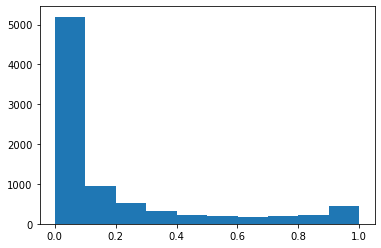

In [23]:
plt.hist(yHat[:, 1])

In [24]:
ypred = (yHat[:, 1] >= 0.5)

In [25]:
fpr, tpr, _ = roc_curve(y_test, yHat[:,1])
rocauc = auc(fpr, tpr)

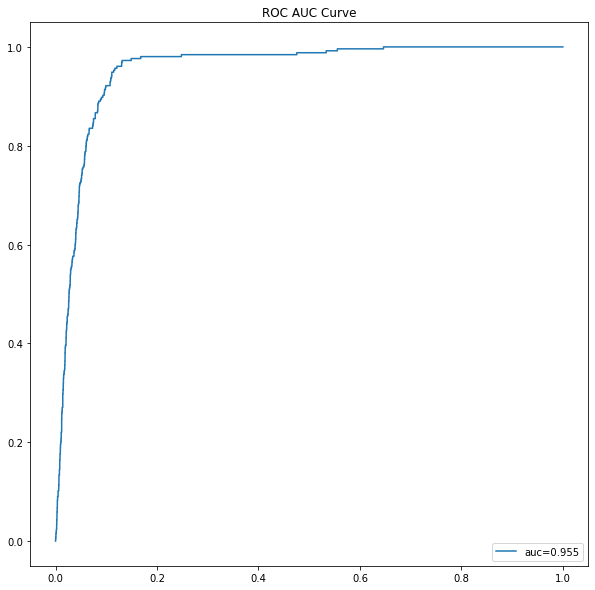

In [26]:

plt.figure(figsize=(10, 10))
plt.title('ROC AUC Curve')
plt.plot(fpr, tpr, label=f'auc={round(rocauc, 3)}')
plt.legend(loc=4)

In [27]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      8151
         1.0       0.20      0.96      0.34       255

    accuracy                           0.89      8406
   macro avg       0.60      0.92      0.64      8406
weighted avg       0.97      0.89      0.92      8406

